# import the required packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import scipy

In [ ]:
# load the dataset using pandas
data = pd.read_csv('creditcard.csv')

In [ ]:
# dataset exploring
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(597, 31)
              Time          V1          V2          V3          V4  \
count   597.000000  597.000000  597.000000  597.000000  597.000000   
mean   2490.879397   -0.320944    0.300392    0.877798    0.101944   
std    1722.150049    1.335511    1.136513    1.074122    1.438919   
min       2.000000   -7.546256   -5.197379   -4.330494   -4.657545   
25%    1077.000000   -1.099826   -0.270414    0.300319   -0.838312   
50%    2179.000000   -0.446501    0.379965    0.900310    0.192064   
75%    3749.000000    1.052661    0.934605    1.524817    1.045618   
max    6633.000000    1.586093    5.050932    4.101716    4.861129   

               V5          V6          V7          V8          V9  ...  \
count  597.000000  597.000000  597.000000  597.000000  597.000000  ...   
mean     0.050534    0.190547    0.019261   -0.043987    0.356295  ...   
std      1.000019    1.312052    0.819425    1.345525    1.056699  ...   
min     -2.698821   -3.016469   -6.267406  -19.176657   -3.3368

V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

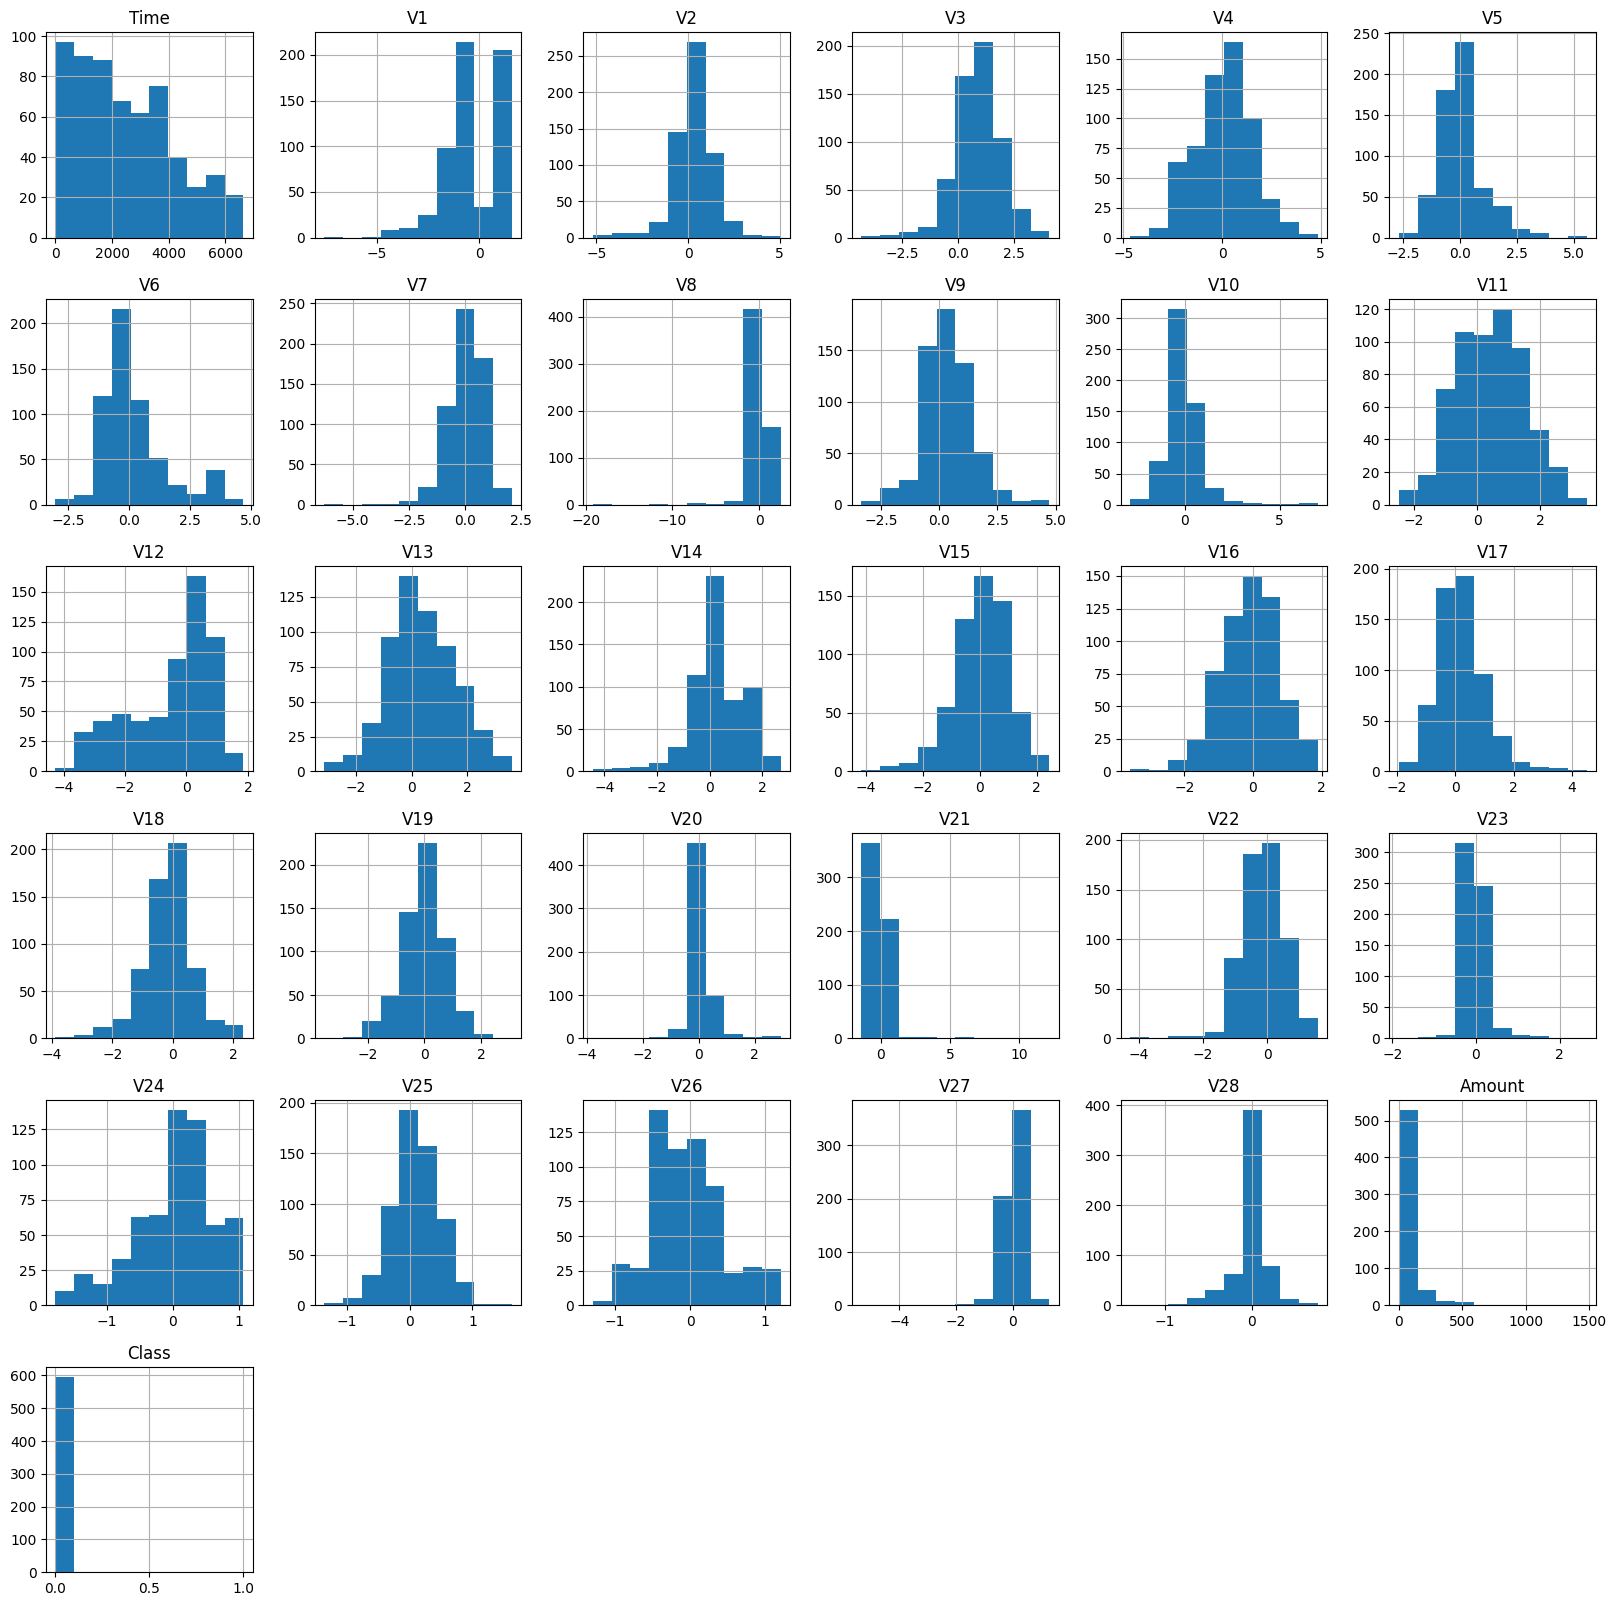

In [ ]:
# Plot histograms of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

In [ ]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0016778523489932886


In [ ]:
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraud Cases: 1
Valid Transactions: 596


In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

<Figure size 1200x900 with 0 Axes>

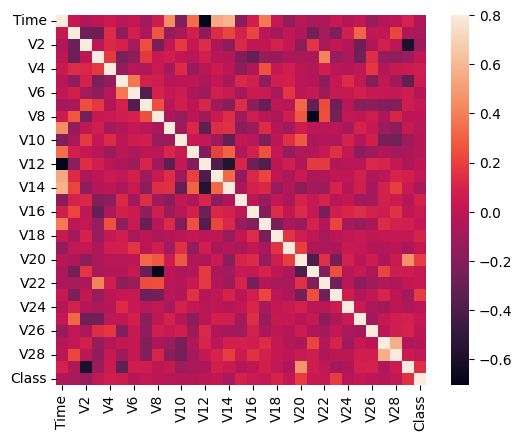

In [ ]:
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

In [ ]:
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

In [ ]:
# Store the variable we'll be predicting on
target = "Class"

In [ ]:
X = data[columns]
Y = data[target]

In [ ]:
# Print shapes
print(X.shape)
print(Y.shape)

(597, 30)
(597,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# define random states
state = 1

In [ ]:
# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [ ]:
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>

In [ ]:
for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Reshape the prediction values to 0 for valid, 1 for fraud.
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
n_errors = (y_pred != Y).sum()

In [ ]:
# Run classification metrics
print('{}: {}'.format(clf_name, n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Local Outlier Factor: 2
0.9966499162479062
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       596
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       597
   macro avg       0.50      0.50      0.50       597
weighted avg       1.00      1.00      1.00       597

